In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [92]:
train = pd.read_csv('/home/praveen/projects/insurance/train.csv')
test = pd.read_csv('/home/praveen/projects/insurance/test.csv')

In [93]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [94]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [95]:
train.shape  , test.shape

((52310, 11), (22421, 10))

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [97]:
train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [98]:
train.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

EPX    0.501204
C2B    0.202925
CWT    0.130243
JZI    0.088301
LWC    0.015408
SSI    0.014911
JWT    0.010514
RAB    0.010075
TST    0.007532
KML    0.005984
ART    0.004263
CCR    0.002982
TTW    0.001988
CBH    0.001453
CSR    0.001147
ADM    0.001071
Name: Agency, dtype: float64


<AxesSubplot:>

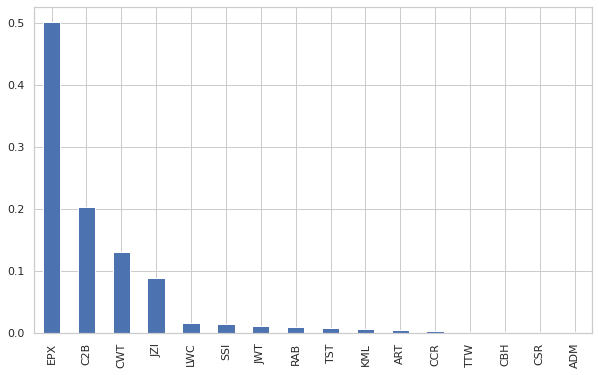

In [99]:
top_10_agency = train['Agency'].value_counts(normalize=True)
print(top_10_agency)
top_10_agency.plot(kind = 'bar',figsize = (10,6))

<AxesSubplot:>

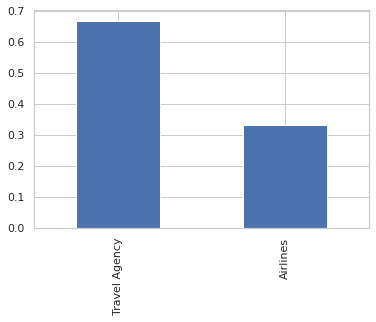

In [100]:
train['Agency Type'].value_counts(normalize = True).plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'EPX'),
  Text(1, 0, 'CWT'),
  Text(2, 0, 'JZI'),
  Text(3, 0, 'C2B'),
  Text(4, 0, 'RAB'),
  Text(5, 0, 'TST'),
  Text(6, 0, 'CSR'),
  Text(7, 0, 'JWT'),
  Text(8, 0, 'LWC'),
  Text(9, 0, 'SSI'),
  Text(10, 0, 'ART'),
  Text(11, 0, 'CCR'),
  Text(12, 0, 'KML'),
  Text(13, 0, 'ADM'),
  Text(14, 0, 'CBH'),
  Text(15, 0, 'TTW')])

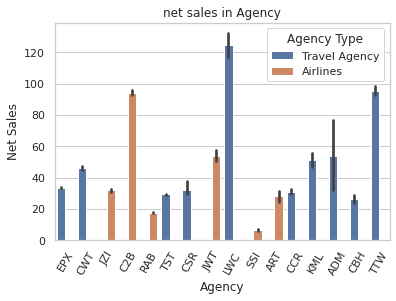

In [101]:
ax = sns.barplot(x="Agency",y='Net Sales', hue="Agency Type", estimator=np.mean, data=train)
plt.title('net sales in Agency')
plt.xticks(rotation=60)

In [102]:
for i in range(len(train)):
    if train['Duration'][i]<0:
        print(train['Duration'].iloc[i])

-1
-1
-1
-2


In [103]:
train.loc[train['Duration'] < 0, 'Duration'] = 1


<AxesSubplot:>

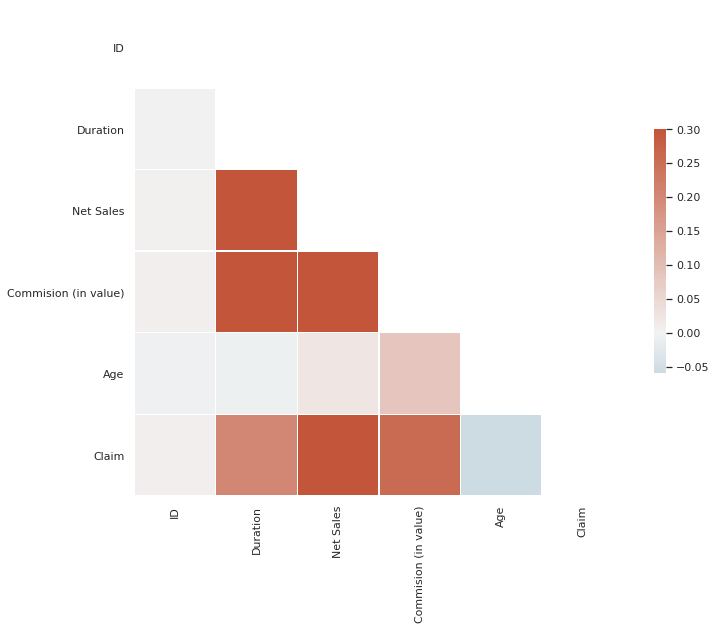

In [104]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))

corr = train.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



<AxesSubplot:>

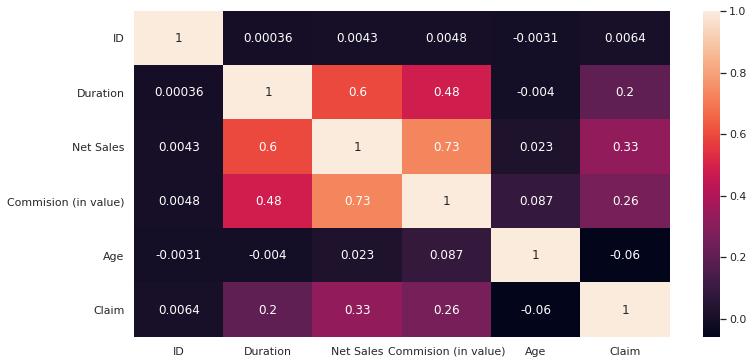

In [105]:
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(),annot = True)

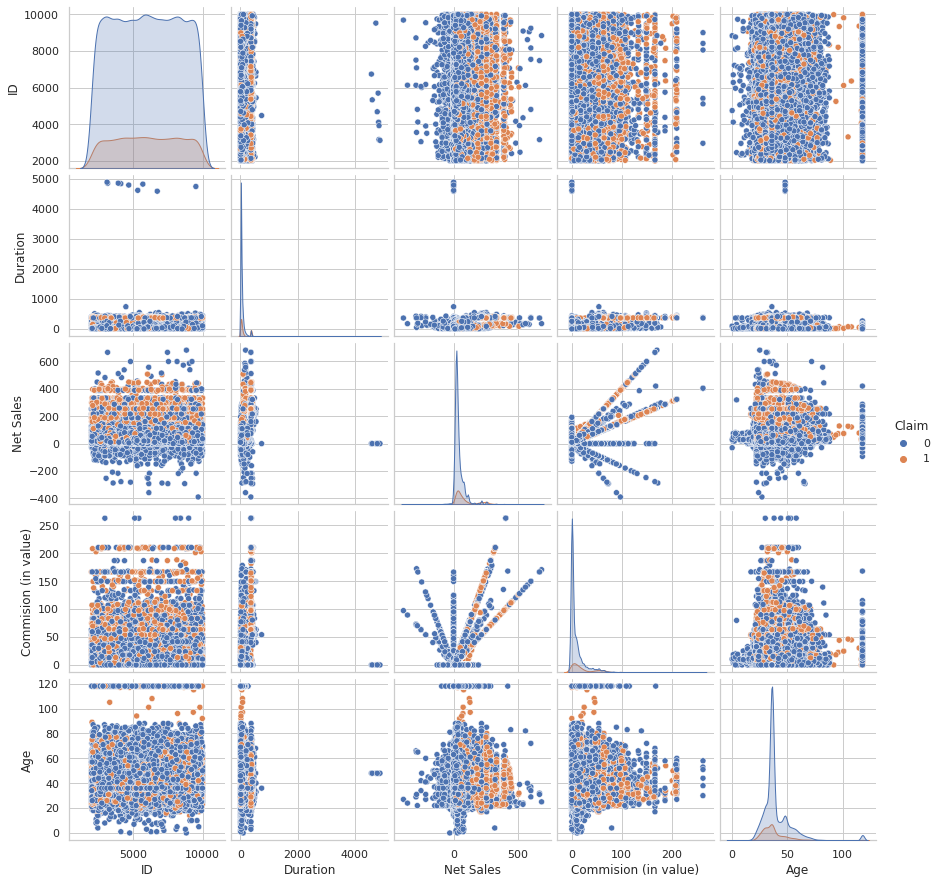

In [106]:
sns.set_style("whitegrid");
sns.pairplot(train, hue="Claim");
plt.show()

<AxesSubplot:>

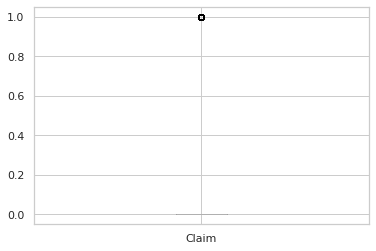

In [107]:
train.boxplot(column = 'Claim')

In [108]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [109]:
lowprice,uppprice = remove_outlier(train['Claim'])
train['Claim']=np.where(train['Claim']>uppprice,uppprice,train['Claim'])
train['Claim']=np.where(train['Claim']<lowprice,lowprice,train['Claim'])

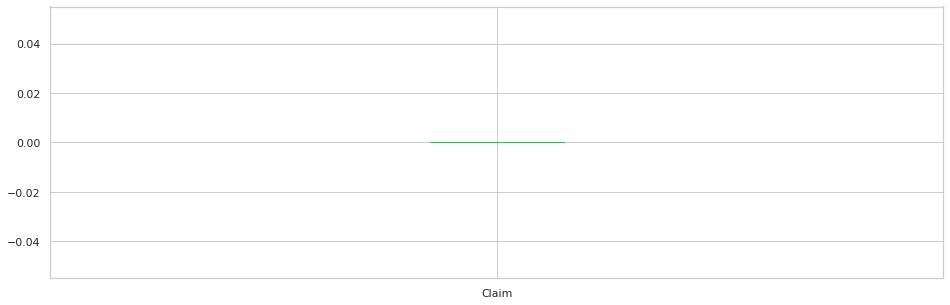

In [110]:
train['Claim'].plot.box(figsize=(16,5))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'EPX'),
  Text(1, 0, 'CWT'),
  Text(2, 0, 'JZI'),
  Text(3, 0, 'C2B'),
  Text(4, 0, 'RAB'),
  Text(5, 0, 'TST'),
  Text(6, 0, 'CSR'),
  Text(7, 0, 'JWT'),
  Text(8, 0, 'LWC'),
  Text(9, 0, 'SSI'),
  Text(10, 0, 'ART'),
  Text(11, 0, 'CCR'),
  Text(12, 0, 'KML'),
  Text(13, 0, 'ADM'),
  Text(14, 0, 'CBH'),
  Text(15, 0, 'TTW')])

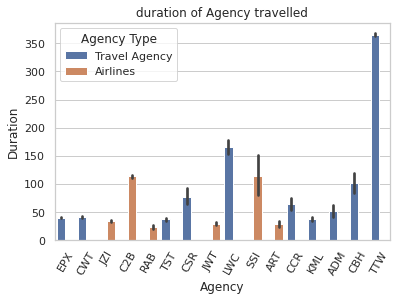

In [111]:
ax = sns.barplot(x="Agency",y='Duration', hue="Agency Type", estimator=np.mean, data=train)
plt.title('duration of Agency travelled')
plt.xticks(rotation=60)

In [112]:
train['Product Name'].value_counts(normalize = True).nlargest(10)

Cancellation Plan                  0.253374
2 way Comprehensive Plan           0.201778
Rental Vehicle Excess Insurance    0.130243
Bronze Plan                        0.090289
Basic Plan                         0.077270
Silver Plan                        0.054712
1 way Comprehensive Plan           0.046052
Annual Silver Plan                 0.044886
Value Plan                         0.037488
Ticket Protector                   0.014911
Name: Product Name, dtype: float64

In [113]:
train.groupby(['Product Name', 'Agency'])['Net Sales'].mean().sort_values(ascending=False)

Product Name                          Agency
Annual Gold Plan                      C2B       356.650083
Annual Travel Protect Platinum        LWC       330.869159
Annual Travel Protect Gold            LWC       258.711839
Annual Silver Plan                    C2B       225.598643
Annual Travel Protect Silver          LWC       197.343618
Premier Plan                          JZI       124.750000
Value Plan                            C2B       121.849921
Individual Comprehensive Plan         TTW        98.819497
Spouse or Parents Comprehensive Plan  TTW        86.000000
Premier Plan                          CBH        76.000000
Gold Plan                             C2B        75.505900
Child Comprehensive Plan              TTW        74.000000
Value Plan                            JZI        68.288941
Premier Plan                          KML        67.365591
Value Plan                            ADM        64.730769
Silver Plan                           C2B        59.400097
Premier Pla

<AxesSubplot:xlabel='Destination,Agency'>

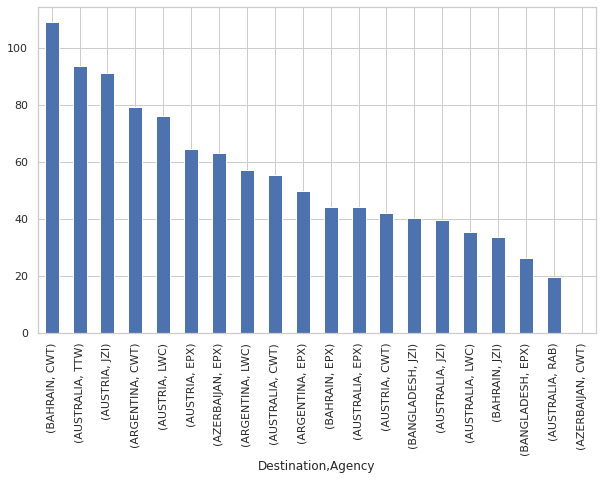

In [114]:
destination = train.groupby(['Destination', 'Agency'])['Net Sales'].mean()[:20].sort_values(ascending=False)
destination.head(20).nlargest(20).plot(kind = 'bar',figsize = (10,6))


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

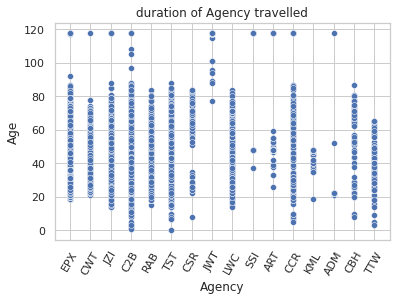

In [115]:
sns.scatterplot(x = 'Agency',y = 'Age',estimator = np.mean,data = train)
plt.title('duration of Agency travelled')
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

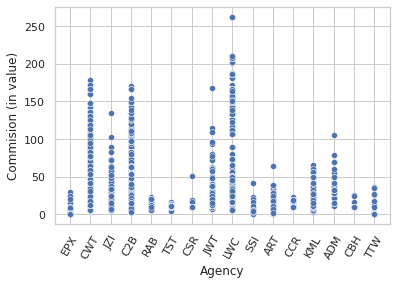

In [116]:
sns.scatterplot(x = 'Agency',y = 'Commision (in value)',data = train)
plt.xticks(rotation=60)

Agency
ADM    39.458929
ART    10.154215
C2B    24.079775
CBH    10.056316
CCR    10.499062
CSR    10.686500
CWT    33.443827
EPX     0.016009
JWT    21.950913
JZI    11.574472
KML    20.239938
LWC    82.393751
RAB     7.182543
SSI     1.844790
TST    10.502667
TTW     1.801755
Name: Commision (in value), dtype: float64


<AxesSubplot:xlabel='Agency'>

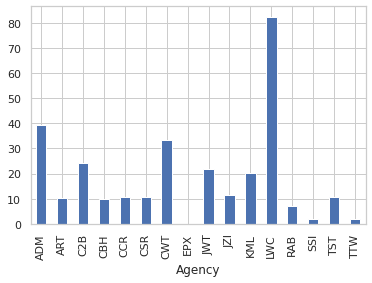

In [117]:
comission = train.groupby('Agency')['Commision (in value)'].mean()[:20]
print(comission)
comission.plot(kind='bar')


In [118]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ID                      3989.00
Duration                  47.00
Net Sales                 35.20
Commision (in value)      13.38
Age                       10.00
Claim                      0.00
dtype: float64


In [119]:
train.skew()

ID                      -0.001854
Duration                15.352559
Net Sales                2.811837
Commision (in value)     3.535694
Age                      2.947891
Claim                    0.000000
dtype: float64

<AxesSubplot:xlabel='Distribution Channel,Agency'>

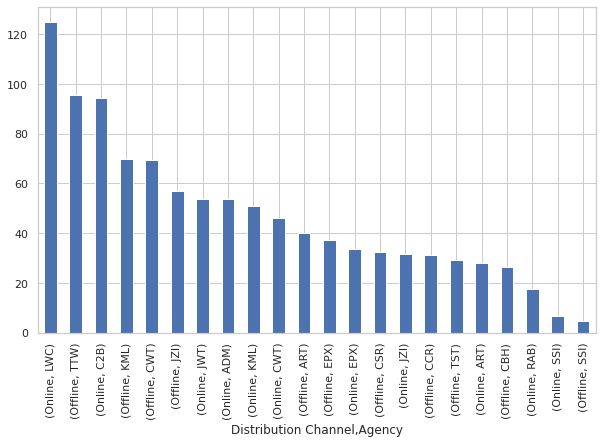

In [120]:
online_net_sale = train.groupby(['Distribution Channel', 'Agency'])['Net Sales'].mean().sort_values(ascending=False)
online_net_sale.plot(kind = 'bar',figsize = (10,6))

In [121]:
train['Claim'].value_counts()
train.loc[train['Claim'] == 'Yes', 'Claim'] = 1
train.loc[train['Claim'] == 'No', 'Claim'] = 0
train['Claim'].value_counts()

0.0    52310
Name: Claim, dtype: int64

In [122]:
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0.0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0.0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0.0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0.0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0.0


In [123]:
from sklearn.preprocessing import LabelEncoder
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = train['Claim']
labels = le.fit_transform(train['Claim'])

In [124]:
test.describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,22421.000000,22421.000000,22421.000000,22421.000000,22421.000000
mean,15499.196646,59.100665,49.446070,12.316924,39.784889
std,2606.751171,114.819397,61.794609,22.957306,13.910773
min,11000.000000,-1.000000,-297.000000,0.000000,1.000000
25%,13236.000000,10.000000,19.800000,0.000000,34.000000
50%,15515.000000,24.000000,29.518868,0.000000,36.000000
75%,17762.000000,58.000000,56.000000,13.630000,43.000000
max,20000.000000,4857.000000,810.000000,283.500000,118.000000


In [125]:
test.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [126]:
categorical_col = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination','Age']
# clean_ti.drop(['Gender'], axis=1, inplace=True)
train['Age'] = train['Age'].fillna("not_disclosed")
train[categorical_col] = train[categorical_col].astype('category') 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    52310 non-null  int64   
 1   Agency                52310 non-null  category
 2   Agency Type           52310 non-null  category
 3   Distribution Channel  52310 non-null  category
 4   Product Name          52310 non-null  category
 5   Duration              52310 non-null  int64   
 6   Destination           52310 non-null  category
 7   Net Sales             52310 non-null  float64 
 8   Commision (in value)  52310 non-null  float64 
 9   Age                   52310 non-null  category
 10  Claim                 52310 non-null  float64 
dtypes: category(6), float64(3), int64(2)
memory usage: 2.3 MB


<ipython-input-127-cb0b17fd0ad3>:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-127-cb0b17fd0ad3>:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-127-cb0b17fd0ad3>:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-127-cb0b17fd0ad3>:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-127-cb0b17fd0ad3>:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-127-cb0b17fd0ad3>:13: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
<ipython-input-127-cb0b17fd0ad3>:13: RuntimeWarning: invalid value encountered in double_scalars
  return 

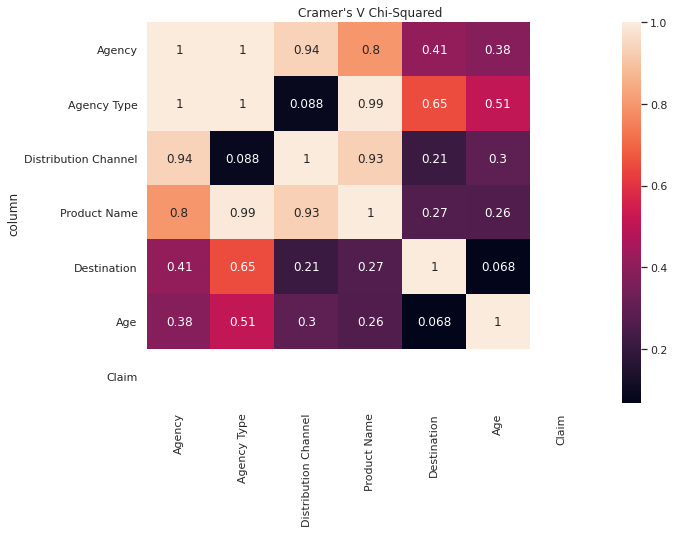

In [127]:
import scipy.stats as ss
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',  'Destination','Age','Claim']
cramers=pd.DataFrame({i:[cramers_v(train[i],train[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap
plt.figure(figsize=(10,7))
plt.title("Cramer's V Chi-Squared")
sns.heatmap(cramers,annot=True)
plt.show()

/home/praveen/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


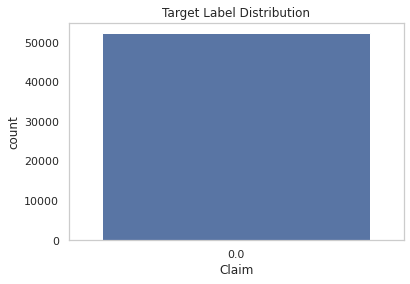

In [136]:
sns.countplot(train['Claim'])
plt.title("Target Label Distribution")
plt.grid(axis='y')
plt.show()

/home/praveen/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


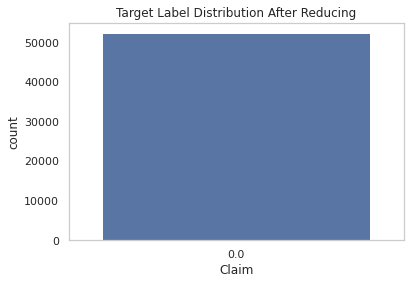

In [129]:
random_no = train[train['Claim']=='No'].sample(frac=1)
n_to_drop = len(random_no) - 10000

clean_reduce = train.drop(axis=0, index=random_no.index[:n_to_drop])

#target columns
sns.countplot(clean_reduce['Claim'])
plt.title("Target Label Distribution After Reducing")
plt.grid(axis='y')
plt.show()

In [130]:
from sklearn.model_selection import train_test_split
from collections import Counter


#split label and features
#One Hot Encoding for categorical data
X = clean_reduce.drop(columns=['Claim'])
X = pd.get_dummies(X, columns=categorical_col).values
# y = clean_ti['Claim'].replace(labels).values
y = clean_reduce['Claim'].replace({'No':0, 'Yes':1}).values
print(f'Datasets Features Size {X.shape}')

#X, y without Oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print('Traininng shape %s' % Counter(y_train))
print('Testing shape %s' % Counter(y_test))

Datasets Features Size (52310, 245)
Traininng shape Counter({0.0: 41848})
Testing shape Counter({0.0: 10462})


In [135]:
from imblearn.over_sampling import SMOTE

#with SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_smote))

ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier


def model_check(models, X_train, y_train):
    for name, model in models.items():
        score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)
        print(f'{name} F1 score : {np.mean(score)}')

models = {'random_forest':RandomForestClassifier(), 
          'logistic_reg':LogisticRegression(), 
          'XGB':XGBClassifier(), 
          'GB':GradientBoostingClassifier()}

print("Without SMOTE")
model_check(models, X_train, y_train)
print()

print("With SMOTE")
model_check(models, X_smote, y_smote)

Without SMOTE
random_forest F1 score : 1.0
logistic_reg F1 score : 0.9752666906692494
XGB F1 score : 1.0
GB F1 score : 1.0

With SMOTE
random_forest F1 score : 0.863737018893803
logistic_reg F1 score : 0.7804859493867813
XGB F1 score : 0.8358295459891237
GB F1 score : 0.8586987274848615


In [ ]:
from sklearn.metrics import f1_score
model = RandomForestClassifier(n_estimators=400, max_depth=8)
score = cross_val_score(model,  X_smote, y_smote, cv=5, scoring='f1', n_jobs=-1)

print(f'Model F1 score : {np.mean(score)}')


Model F1 score : 0.8434286864237958


In [ ]:
from sklearn.linear_model import LogisticRegression
#Entrainement
lr = LogisticRegression()
lr.fit(X_train,y_train)
#Prédiction
y_lr = lr.predict(X_test)
print(y_lr)

/home/praveen/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 ... 0 1 0]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13077
           1       1.00      1.00      1.00      2616

    accuracy                           1.00     15693
   macro avg       1.00      1.00      1.00     15693
weighted avg       1.00      1.00      1.00     15693



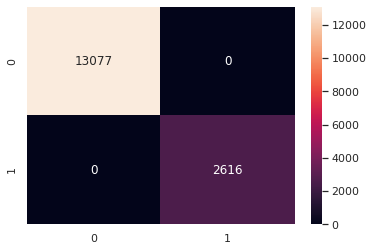

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_predict = lr.predict(X_test)>0.5

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt="d")
print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)

#Fit the model with data (aka "model training")
knn.fit(X,y)
y_pre = knn.predict(X_test)
print(y_pre)



[0 0 0 ... 0 0 0]


In [134]:
len(y_pre)

15693